# Proyek Analisis Data: [BIKE SHARING DATASET]
- **Nama:** [Adam Havenia Pratama]
- **Email:** [adamhavenia14@gmail.com]
- **ID Dicoding:** [adam_hp]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda? 
- Bagaimana tren penyewaan sepeda berdasarkan jam dalam sehari? 
- Apakah kondisi cuaca memengaruhi jumlah penyewaan sepeda? 
- Dimana lokasi dengan jumlah penyewaan tertinggi dan terendah?


## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
hari_df = pd.read_csv(r'C:\Users\LENOVO\Documents\Python\BikeSharing\day.csv')
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
jam_df = pd.read_csv(r'C:\Users\LENOVO\Documents\Python\BikeSharing\hour.csv')
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data agregat penyewaan sepeda per hari.
- Dataset hour.csv berisi data penyewaan per jam, sehingga lebih rinci.
- Kedua dataset memiliki kolom yang hampir sama, kecuali hr (jam) yang hanya ada di hour.csv.

### Assessing Data

In [5]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print('Jumlah duplikasi:', hari_df.duplicated().sum())
print('Jumlah missing value:', hari_df.isna().sum().sum())

Jumlah duplikasi: 0
Jumlah missing value: 0


In [7]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print('Jumlah duplikasi:', jam_df.duplicated().sum())
print('Jumlah missing value:', jam_df.isnull().sum().sum())

Jumlah duplikasi: 0
Jumlah missing value: 0


**Insight:**
- Tidak ada mising value dalam kedua dataset tersebut
- Tidak ada duplikasi data dari data tersebut
- Type data pada dtday harusnya adalah datetime bukan object sehingga perlu di rubah ke dalam datetime dulu

### Cleaning Data

In [9]:
# Mengonversi kolom 'dteday' menjadi datetime
hari_df["dteday"] = pd.to_datetime(hari_df["dteday"])
jam_df["dteday"] = pd.to_datetime(jam_df["dteday"])

In [10]:
# Menambahkan kategori untuk 'season'
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
hari_df["season"] = hari_df["season"].map(season_mapping)
jam_df["season"] = jam_df["season"].map(season_mapping)

In [11]:
# Menambahkan kategori untuk 'weathersit'
weather_mapping = {
    1: "Clear/Few Clouds",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
hari_df["weathersit"] = hari_df["weathersit"].map(weather_mapping)
jam_df["weathersit"] = jam_df["weathersit"].map(weather_mapping)


In [12]:
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,Clear/Few Clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,Clear/Few Clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,Clear/Few Clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear/Few Clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear/Few Clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear/Few Clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear/Few Clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear/Few Clouds,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- kolom dteday sudah dikonverisi ke dalam type data datetime
- season sekarang menggunakan nama musim yaitu spring, summer, fall dan winter
- kolom weathersit saya jadikan lebih mudah kak dipahami dengan label yaitu Clear, Mist, Light Snow, Heavy Rain

## Exploratory Data Analysis (EDA)

### Explore ...

saya kepo dengan distribusi data, tren waktu antara hari kerja dan akhir pekan, serta pengaruh eskternal sperti cuaca

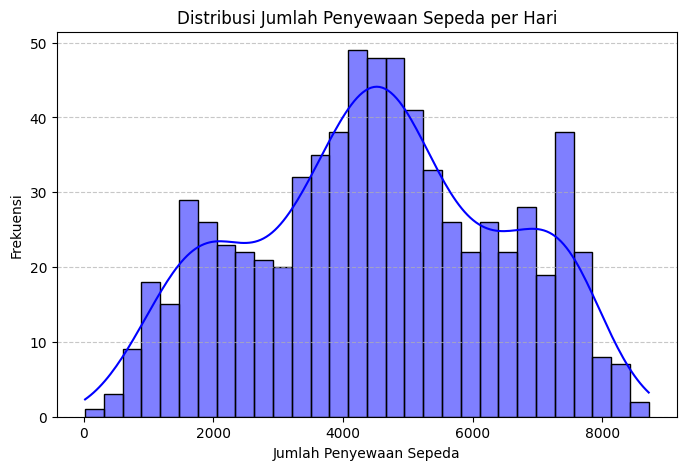

In [15]:
#distribusi jumlah penyewaan sepeda per hari 
plt.figure(figsize=(8,5))
sns.histplot(hari_df["cnt"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Penyewaan Sepeda per Hari")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight**
- Menurut saya berdasarkan grafik tersebut, distribusi penyewaan sepeda perhari relatif normal

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17256\2383923540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="cnt", data=hari_df, palette="muted")


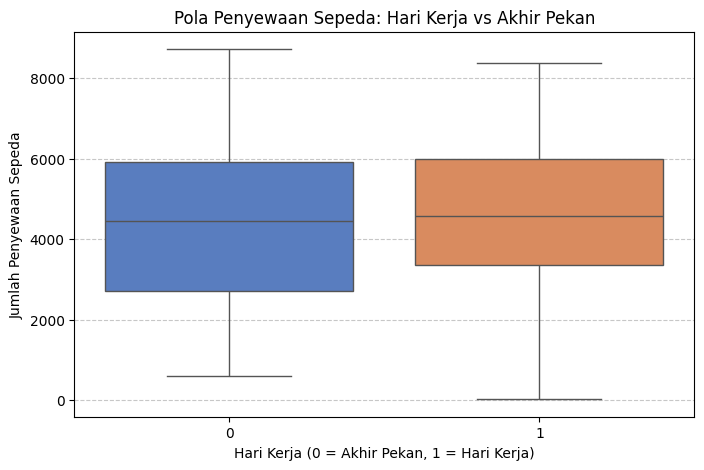

In [16]:
#Pola penyewaan antara hari kerja dan hari libur
plt.figure(figsize=(8,5))
sns.boxplot(x="workingday", y="cnt", data=hari_df, palette="muted")
plt.xlabel("Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**insight**
- Berdasarkan data tersbut, tidak ada perbedaan signifikan antara hari kerja dan hari libur, yang menunjukan bahwa sepeda digunakan mungkin sebagai transportasi bagi masyarakat di Washington DC pada tahun tersebut

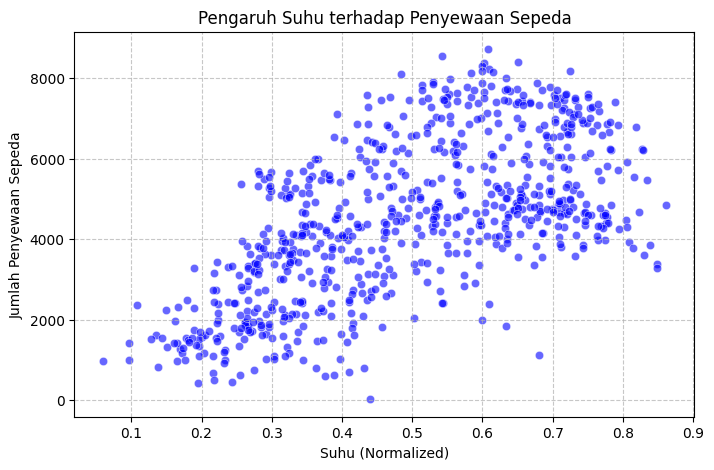

In [17]:
#Pengaruh suhu terhadap penyewaan sepeda
plt.figure(figsize=(8,5))
sns.scatterplot(x="temp", y="cnt", data=hari_df, alpha=0.6, color="blue")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pengaruh Suhu terhadap Penyewaan Sepeda")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Insight**
- Semakin tinggi temperatur atau suhu, semakin banyak juga penyewaan sepeda yang dilakukan oleh masyarakat tetapi pada suhu yang terlalu tinggi cenderung menurun
- berdasarkan data tersebut, terdapat korelasi antara suhu dan banyaknya penyewa sepeda

**Insight Explore**
- Distribusi penyewaan sepeda menunjukkan pola musiman dengan banyak pengguna pada kisaran 2000-6000 per hari.
- Hari kerja dan akhir pekan memiliki pola penyewaan yang hampir sama, menunjukkan penggunaan untuk berbagai keperluan.
- Suhu berpengaruh positif terhadap penyewaan sepeda, tetapi terlalu panas dapat menurunkan penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda? 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17256\348930097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=seasonal_avg, palette="coolwarm")


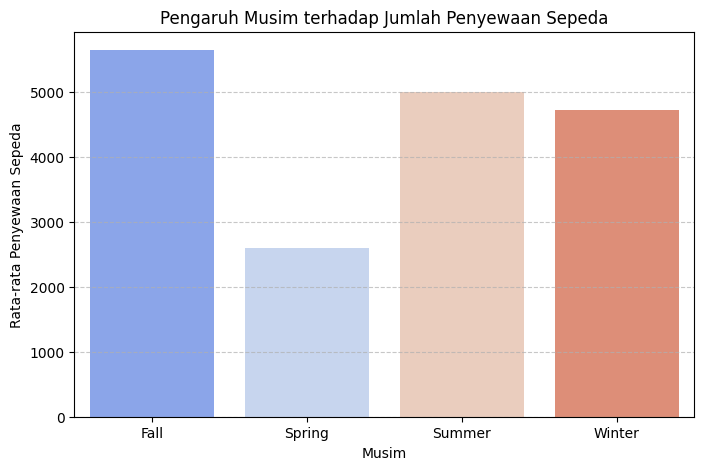

In [18]:
# Menghitung rata-rata penyewaan sepeda per musim
seasonal_avg = hari_df.groupby("season")["cnt"].mean().reset_index()

# Visualisasi jumlah penyewaan per musim
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=seasonal_avg, palette="coolwarm")

# Menambahkan label dan judul
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pengaruh Musim terhadap Jumlah Penyewaan Sepeda")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
+ Musim gugur (Fall) memiliki jumlah penyewaan tertinggi, kemungkinan karena cuaca lebih nyaman untuk bersepeda.
+ Musim semi (Spring) memiliki penyewaan terendah, mungkin karena cuaca masih terlalu dingin atau hujan.
+ Musim panas (Summer) dan musim dingin (Winter) memiliki jumlah penyewaan yang cukup tinggi, tetapi masih di bawah musim gugur.

*kesimpulan*: Musim berpengaruh terhadap penyewaan sepeda dengan tren tertinggi adalah terjadi pada musim gugur (Fall)

### Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan jam dalam sehari?

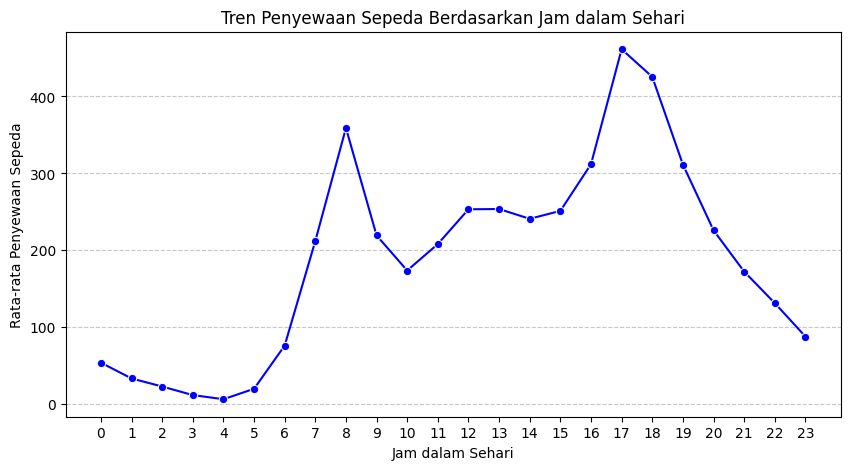

In [19]:
# Menghitung rata-rata penyewaan per jam
hourly_avg = jam_df.groupby("hr")["cnt"].mean().reset_index()

# Visualisasi tren penyewaan sepeda berdasarkan jam dalam sehari
plt.figure(figsize=(10,5))
sns.lineplot(x="hr", y="cnt", data=hourly_avg, marker="o", linestyle="-", color="b")

# Menambahkan label dan judul
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Insight:** 


Ada dua puncak penyewaan sepeda: 
- Pagi hari (07:00 - 09:00 AM) → Waktu orang berangkat kerja.
- Sore hari (17:00 - 19:00 PM) → Waktu pulang kerja atau sekolah.
- Jam 00:00 - 05:00 memiliki penyewaan yang sangat rendah, kemungkinan karena tidak banyak aktivitas saat itu.


*Kesimpulan*: Penyewaan sepeda memiliki pola dua puncak utama (morning & evening rush hour), menunjukkan bahwa sepeda banyak digunakan untuk transportasi kerja.

### Pertanyaan 3: Apakah kondisi cuaca memengaruhi jumlah penyewaan sepeda?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17256\2805435734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=hari_df, palette="Set2")


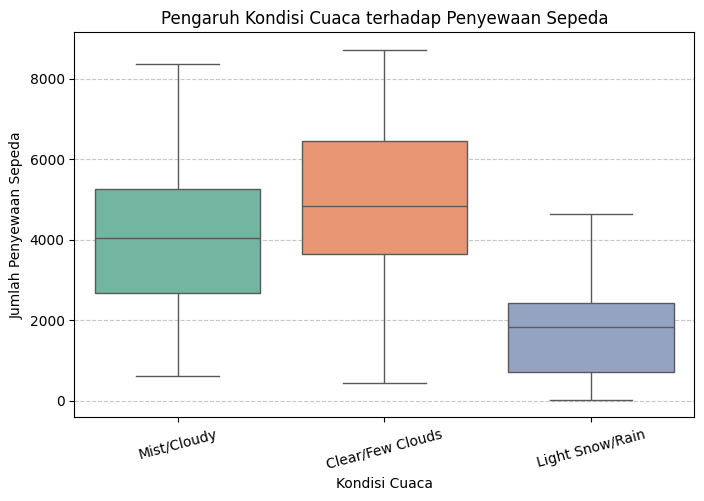

In [20]:
# Visualisasi distribusi penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(8,5))
sns.boxplot(x="weathersit", y="cnt", data=hari_df, palette="Set2")

# Menambahkan label dan judul
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:** 
- Hari dengan cuaca cerah atau sedikit berawan memiliki jumlah penyewaan tertinggi.
- Hari berkabut atau mendung memiliki jumlah penyewaan sedang.
- Hari dengan hujan ringan atau salju memiliki penyewaan yang jauh lebih rendah.

*Kesimpulan*: Cuaca berpengaruh signifikan terhadap penyewaan sepeda. Penyewaan menurun drastis saat hujan atau salju, menunjukkan bahwa orang cenderung menghindari bersepeda dalam kondisi buruk.

## Analisis Lanjutan (Opsional)

In [21]:
# Memilih kolom numerik saja untuk korelasi
numeric_columns = hari_df.select_dtypes(include=['int64', 'float64']).columns

# Menghitung korelasi antara jumlah penyewaan sepeda ('cnt') dengan variabel numerik
correlation_matrix = hari_df[numeric_columns].corr()["cnt"].sort_values(ascending=False)

# Menampilkan hasil korelasi
correlation_matrix

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
Name: cnt, dtype: float64

**Tujuan**
Mengetahui hubungan antara penyewaan sepeda dengan variabel

**Insight:**

Kesimpulan dari informasi korelasi tersebut:
- registered    0.945517 : Pengguna terdaftar (registered users) adalah faktor utama dalam penyewaan sepeda. Semakin banyak pengguna terdaftar, semakin tinggi jumlah penyewaan.
- casual        0.672804 : Pengguna tidak terdaftar (casual users) juga memiliki korelasi yang cukup tinggi. Ini menunjukkan bahwa masih ada banyak orang yang menggunakan sepeda tanpa langganan tetap.
- atemp         0.631066 : Suhu yang dirasakan (feels-like temperature) sangat berpengaruh terhadap penyewaan sepeda. Semakin nyaman suhu udara, semakin banyak sepeda yang disewa.
- temp          0.627494 : Suhu aktual juga memiliki korelasi yang signifikan. Namun, suhu yang dirasakan lebih berpengaruh daripada suhu asli.
- yr            0.566710 :Jumlah penyewaan meningkat dari tahun 2011 ke 2012. Ini menunjukkan tren pertumbuhan sistem bike-sharing.
- holiday      -0.068348 : Hari libur tidak banyak mempengaruhi penyewaan sepeda, tetapi sedikit menurunkannya.
- hum          -0.100659 : Kelembapan udara juga berdampak negatif, tetapi tidak terlalu signifikan.
- windspeed    -0.234545 :Kecepatan angin memiliki dampak negatif terhadap penyewaan sepeda. Semakin kencang angin, semakin sedikit orang yang menyewa sepeda.

## Conclusion

- Conclution pertanyaan 1 : Musim berpengaruh terhadap penyewaan sepeda dengan tren tertinggi adalah terjadi pada musim gugur (Fall)
- Conclution pertanyaan 2 : Penyewaan sepeda memiliki pola dua puncak utama (morning & evening rush hour), menunjukkan bahwa sepeda banyak digunakan untuk transportasi kerja.
- Conclution pertanyaan 3 : Cuaca berpengaruh signifikan terhadap penyewaan sepeda. Penyewaan menurun drastis saat hujan atau salju, menunjukkan bahwa orang cenderung menghindari bersepeda dalam kondisi buruk.